In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Increase the quality and resolution of our charts so we can copy/paste or just
# directly save from here.
# See:
# https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

# You can also just do this in Colab/Jupyter, some "magic":
# %config InlineBackend.figure_format='retina'

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
# need to run these commands the very first time you use these packages
# nltk.download('stopwords') 
# nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [2]:
df = pd.read_csv('finalnewsdataprocessed.csv')
df_final = df[['Source', 
               'Source Bias', 
               'Author', 
               'Title', 
               'Overall Sentiment',
               'compound score', 
               'negative score', 
               'positive score', 
               'neutral score']]
df_final.sort_values(by='Source')

,Source,Source Bias,Author,Title,Overall Sentiment,compound score,negative score,positive score,neutral score
1476,Al Jazeera English,-4.4,Tanvir Chowdhury,Rohingya crisis: Relocation plan meets opposition,-1,-0.6249,0.451,0.000,0.549
1160,Al Jazeera English,-4.4,Al Jazeera,"After France refused rescue ship to dock, refu...",1,0.2960,0.162,0.324,0.515
1159,Al Jazeera English,-4.4,Al Jazeera,A Place of Refuge: Malmo and Nickelsdorf,0,0.0000,0.000,0.000,1.000
733,Al Jazeera English,-4.4,Jihan Abdalla,Muslim American votes may carry outsize weight...,0,0.0000,0.000,0.000,1.000
734,Al Jazeera English,-4.4,Laurin-Whitney Gottbrath,Pandemic exacerbates barriers to voting for ho...,0,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...
172,USA Today,-1.3,"USA TODAY, Ledyard King and Phillip M. Bailey,...","'Anxious, fearful, angry.' At 50 days out to E...",-1,-0.4939,0.151,0.000,0.849
173,USA Today,-1.3,"USA TODAY, Donovan Slack, USA TODAY",Trump appointees torpedo report on voting acce...,0,0.0000,0.000,0.000,1.000
174,USA Today,-1.3,"USA TODAY, Sarah Spicer, Opinion contributor",Vulnerable Kansas bird populations are a canar...,-1,-0.2263,0.147,0.000,0.853
167,USA Today,-1.3,"USA TODAY, Suzette Hackney, USA TODAY",Honor Justice Ruth Bader Ginsburg by registeri...,1,0.7650,0.000,0.398,0.602


In [3]:
# Set style for all graphs
plt.style.use('fivethirtyeight')

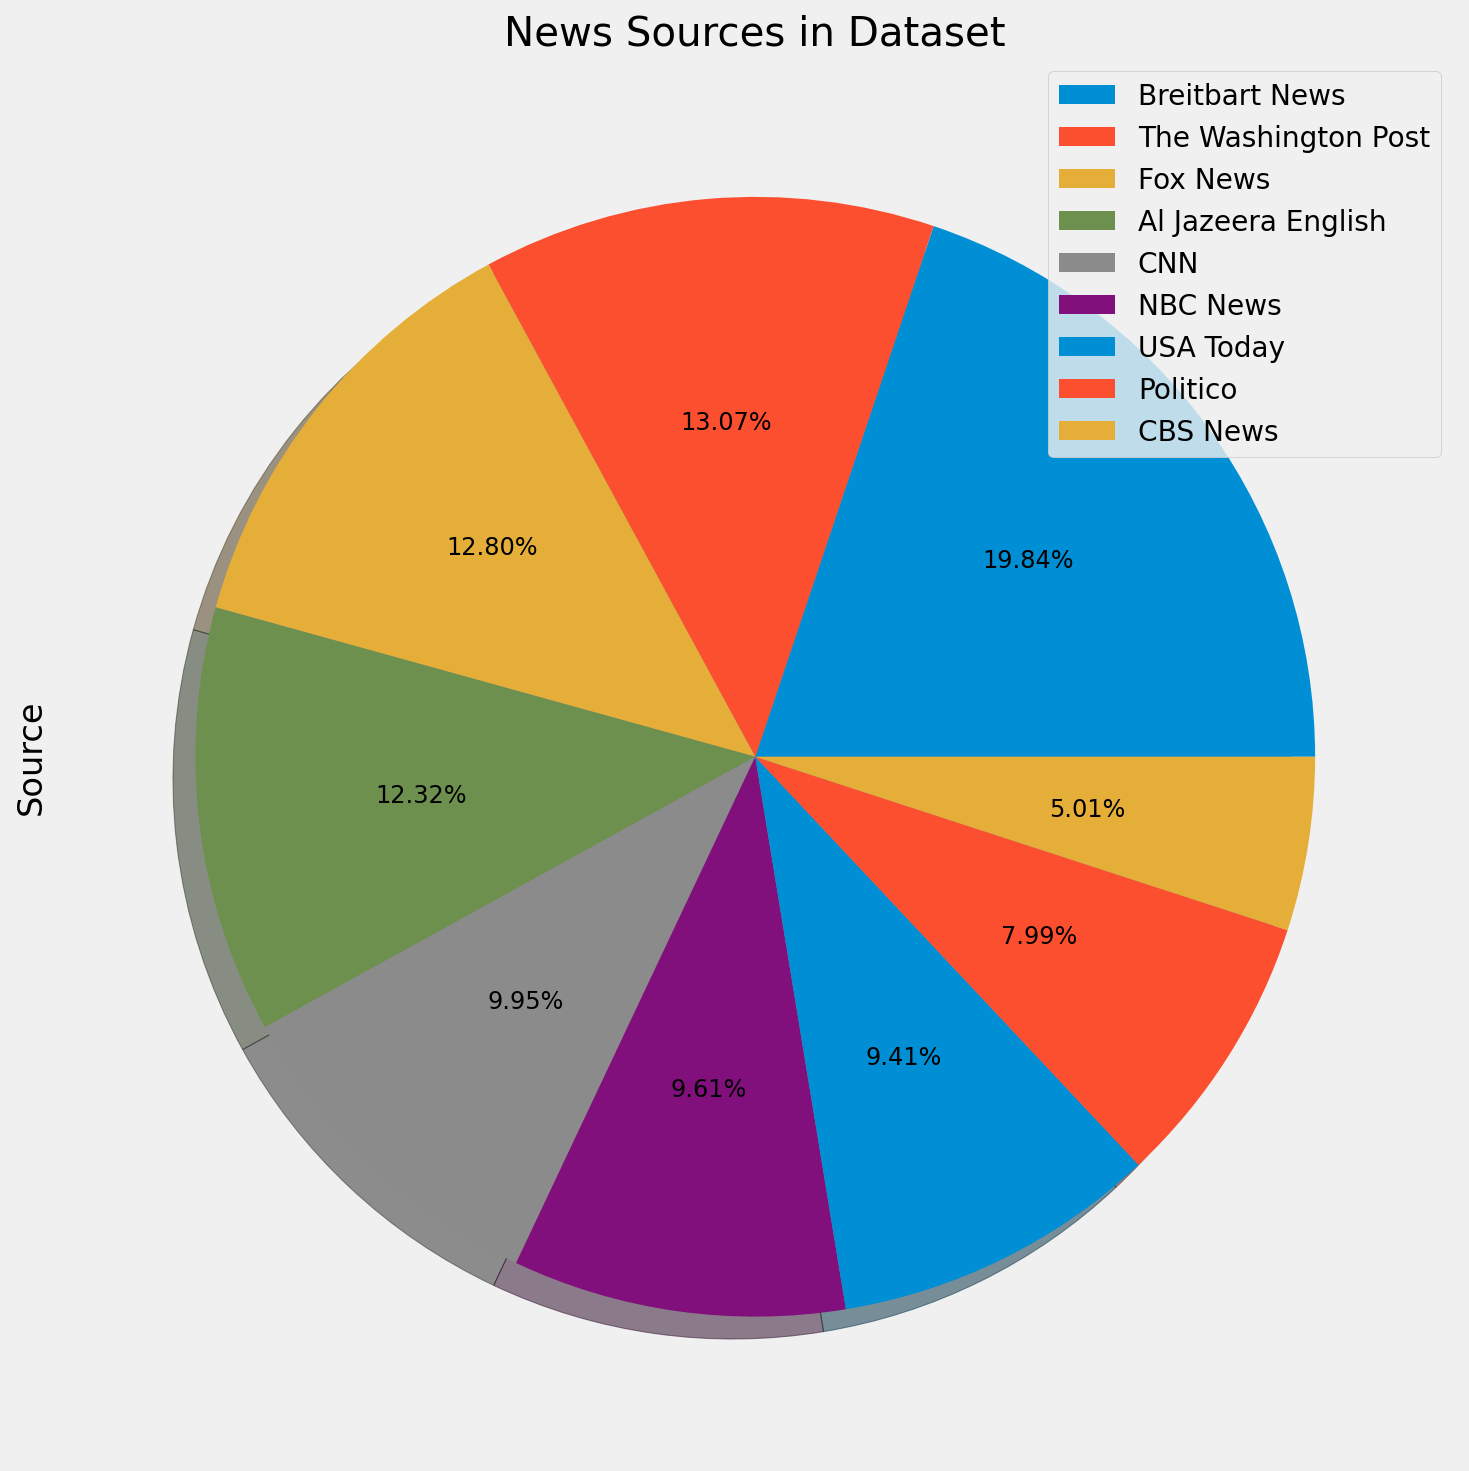

In [4]:
# Pie chart of news sources in dataset
pie = df['Source'].value_counts().plot.pie(autopct='%.2f%%', fontsize=12, figsize=(12, 12), labeldistance=None, legend=True, shadow=True, title='News Sources in Dataset')
pie
plt.show()


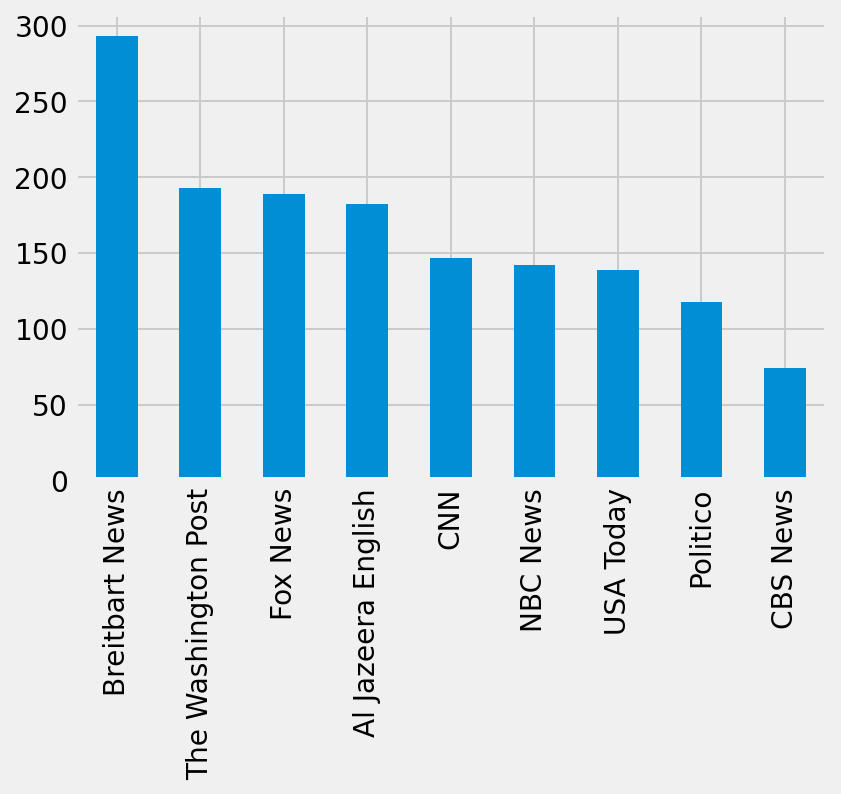

In [5]:
# Bar graph of news sources in data set
df['Source'].value_counts().plot.bar()
plt.show()


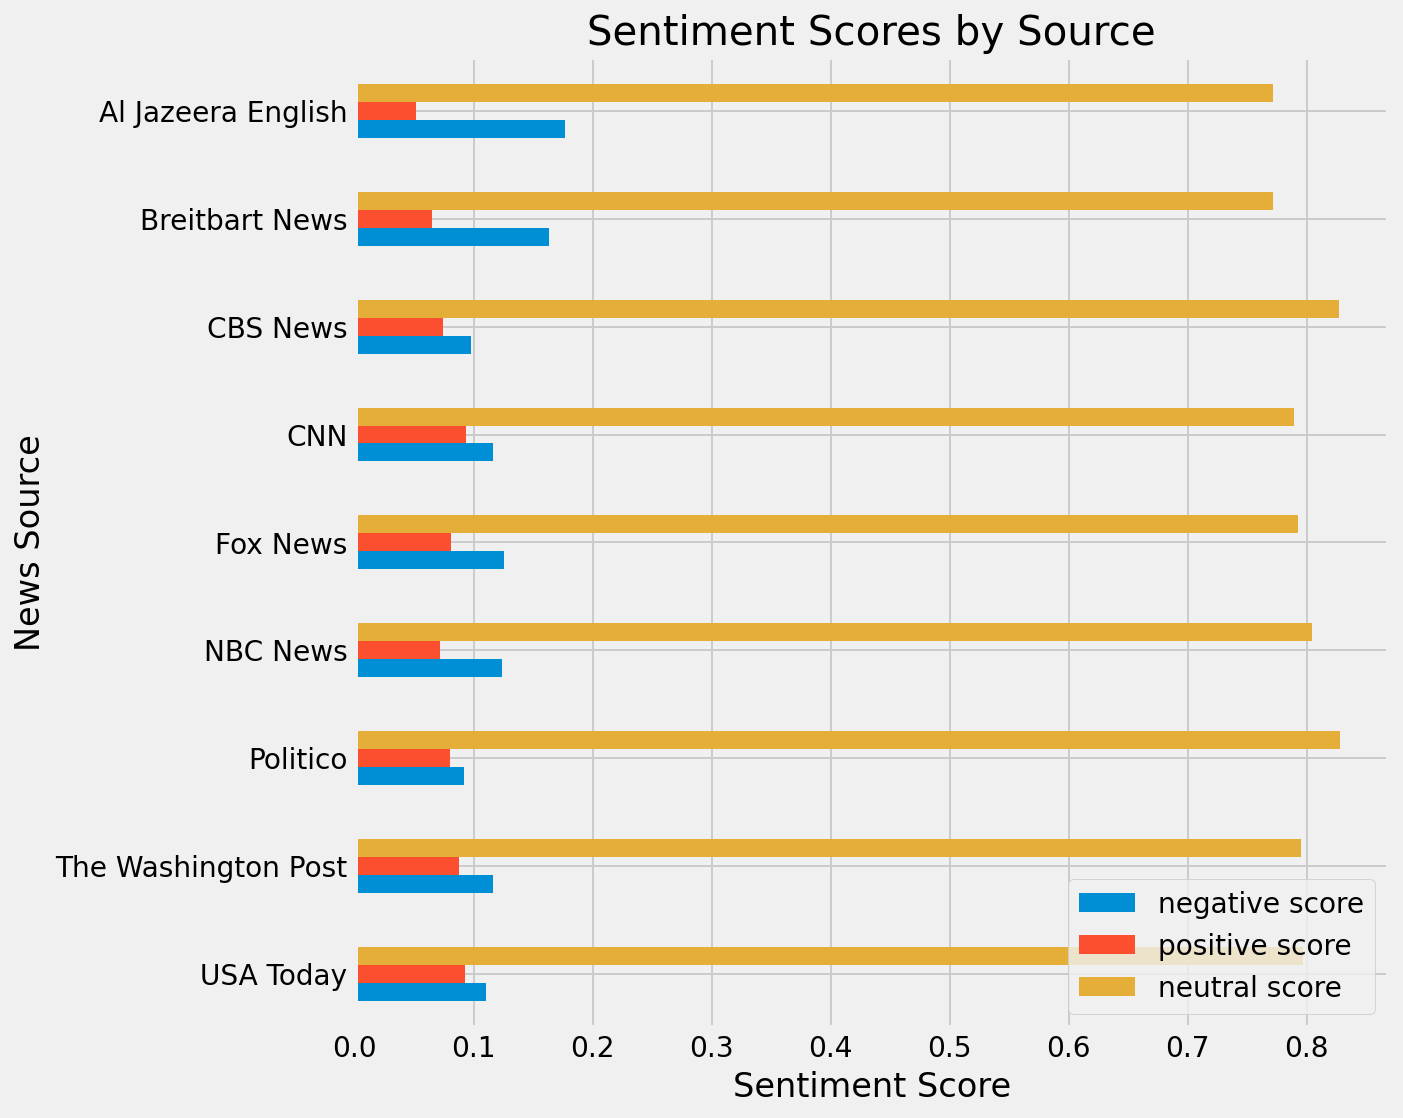

In [6]:
# Bar graph of composite sentiment scores by source
df[['Source', 'negative score', 'positive score', 'neutral score']].groupby('Source').mean().sort_values(by='Source', ascending=False).plot.barh(figsize=(10, 8), title = 'Sentiment Scores by Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.tight_layout()
scores = df.groupby('Source').mean()


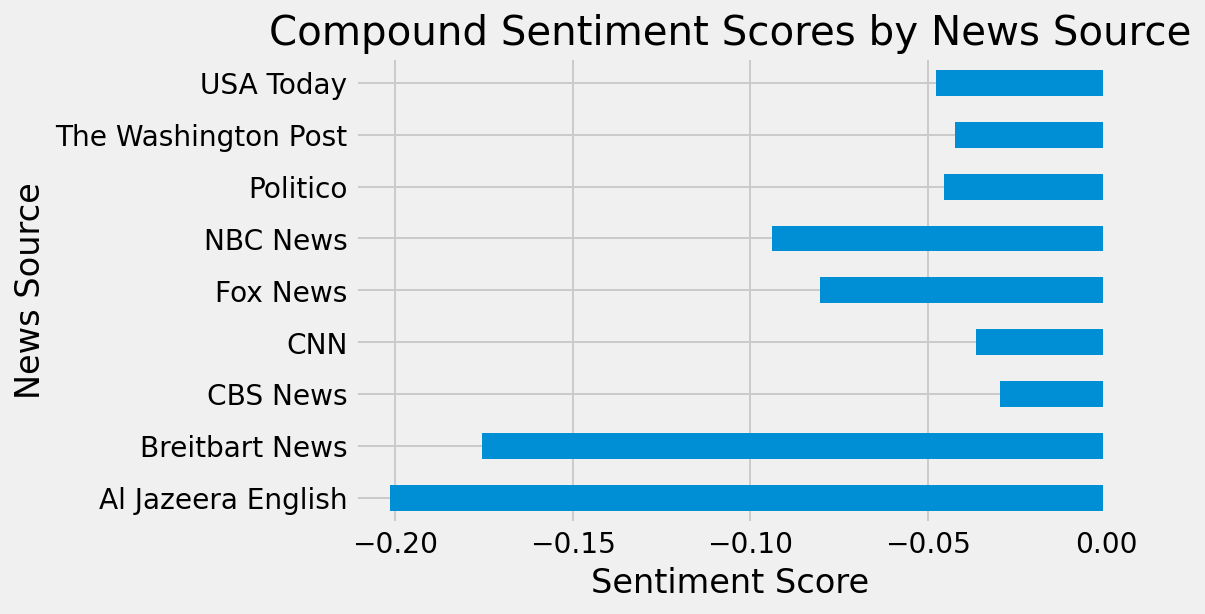

In [7]:
# Bar graph of compound sentiment scores by source
scores['compound score'].plot.barh(title='Compound Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

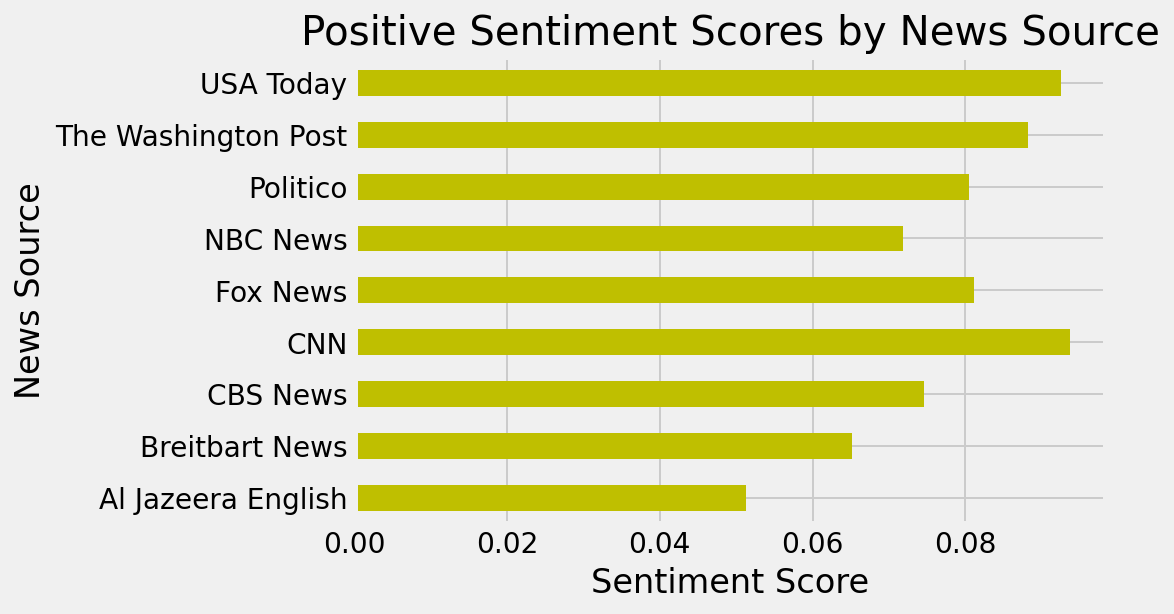

In [8]:
# Bar graph of positive sentiment scores by source 
scores['positive score'].plot.barh(color='y', title='Positive Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

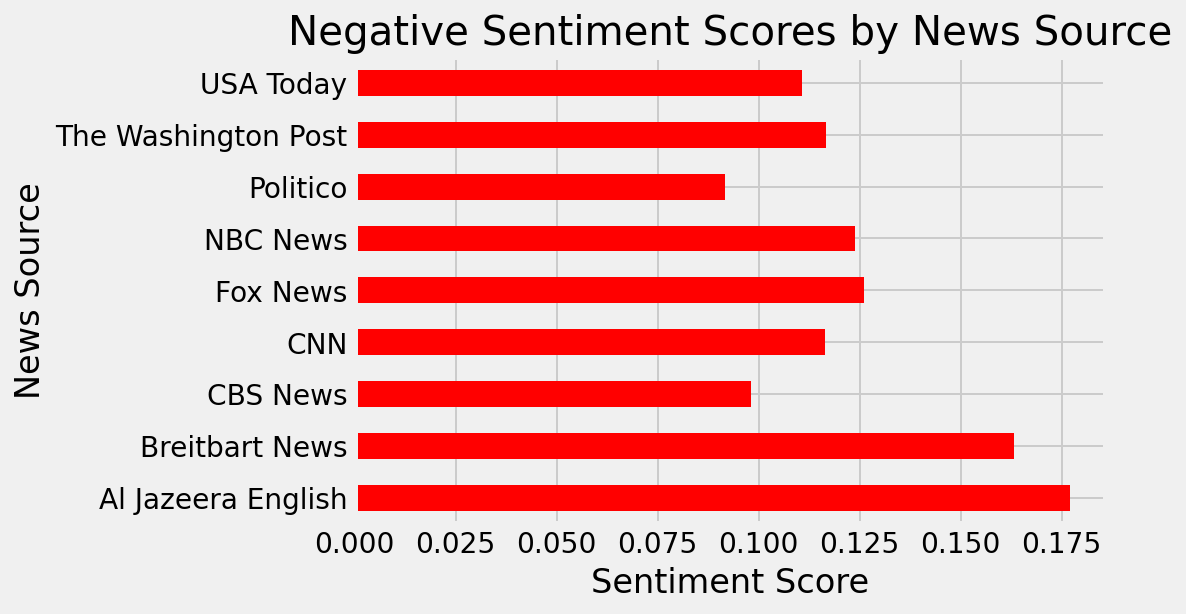

In [9]:
# Bar graph of negative sentiment score by source
scores['negative score'].plot.barh(color='r', title='Negative Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

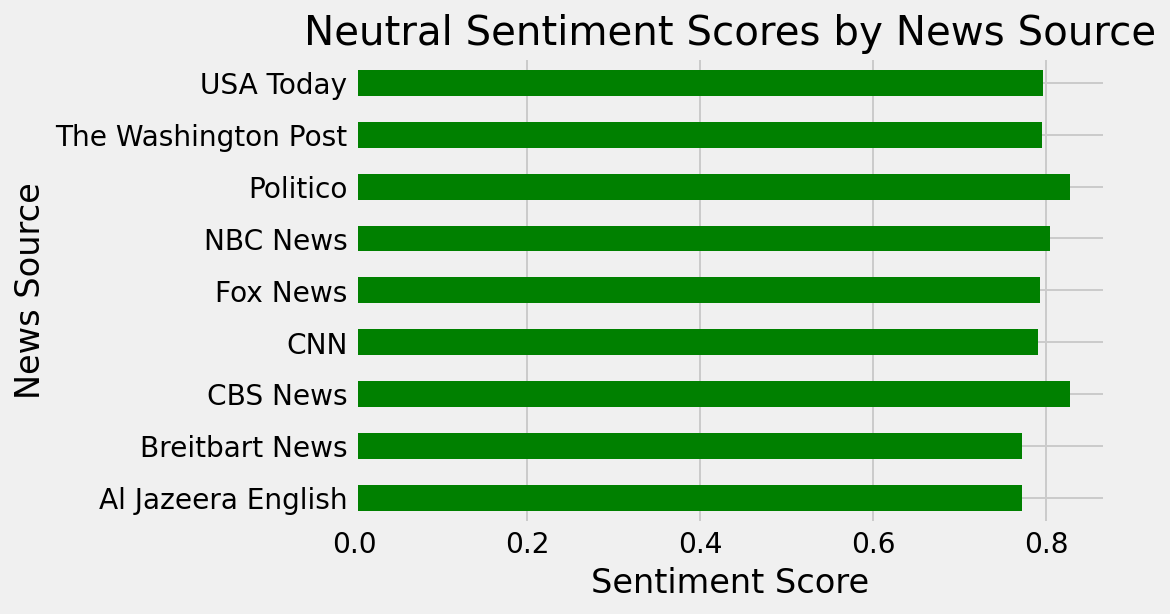

In [10]:
# Bar graph of neutral sentiment score by source
scores['neutral score'].plot.barh(color='green', title='Neutral Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

In [11]:
scores

,compound score,negative score,positive score,neutral score,Overall Sentiment,Source Bias
Source,,,,,,
Al Jazeera English,-0.201256,0.177148,0.051253,0.771615,-0.368132,-4.4
Breitbart News,-0.175600,0.163249,0.065174,0.771573,-0.259386,2.9
CBS News,-0.029945,0.098068,0.074622,0.827324,-0.081081,-1.6
CNN,-0.036549,0.116354,0.093782,0.789871,-0.054422,-2.2
Fox News,-0.080363,0.125974,0.081153,0.792857,-0.137566,2.0
NBC News,-0.094059,0.123754,0.071873,0.804394,-0.176056,-2.1
Politico,-0.045558,0.091593,0.080492,0.827924,-0.093220,-3.5
The Washington Post,-0.042474,0.116705,0.088181,0.795119,-0.051813,-3.7
USA Today,-0.047829,0.110719,0.092518,0.796777,-0.086331,-1.3


In [14]:
# Calculate mean compound score 
mean_compound = df['compound score'].mean()
print(f'The average compound sentiment score is {mean_compound:.2f}.')

The average compound sentiment score is -0.10.


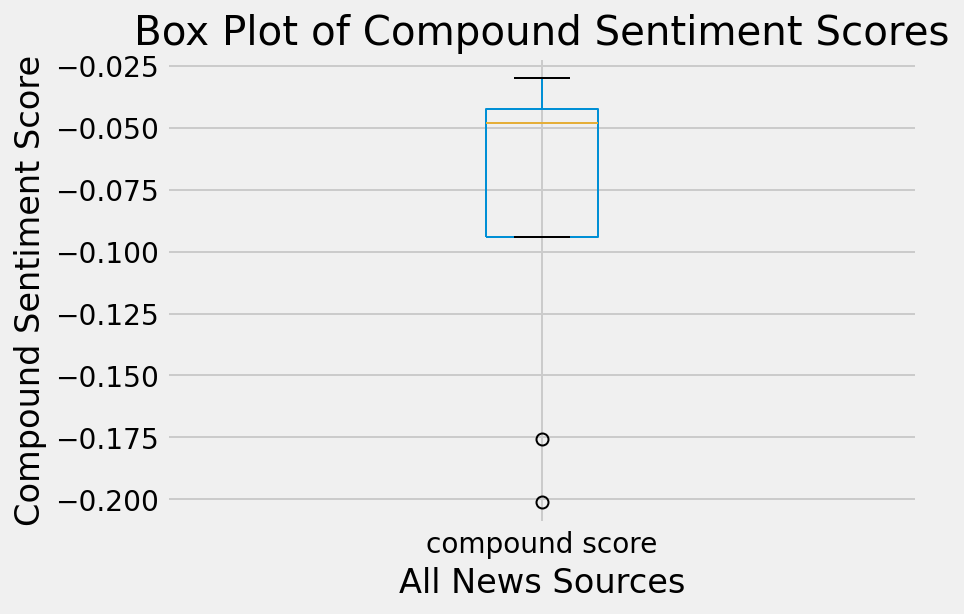

In [24]:
# Box plot of average compound score
scores['compound score'].plot.box(title='Box Plot of Compound Sentiment Scores')
plt.ylabel('Compound Sentiment Score')
plt.xlabel('All News Sources')
plt.show()

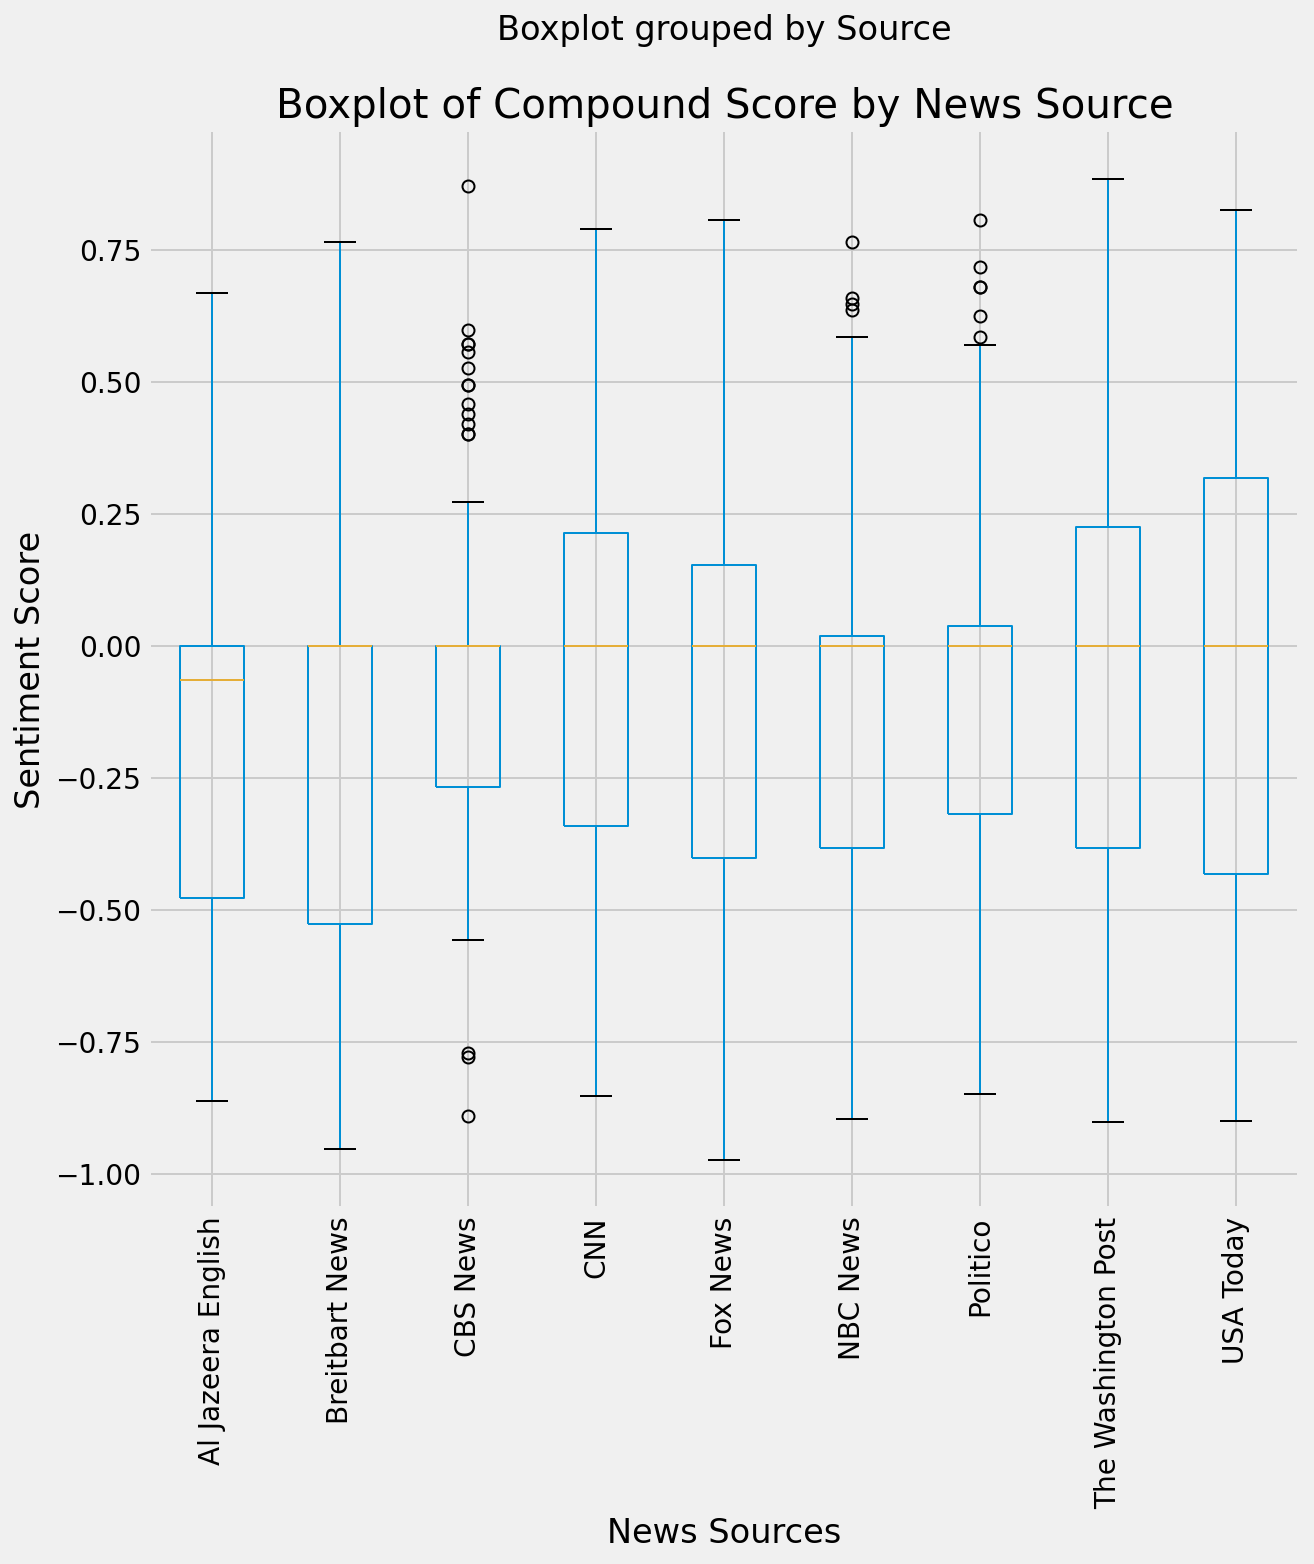

In [26]:
# Boxplot of compound scores by news sources
df.boxplot(column='compound score', by='Source', figsize=(10, 10)) 
plt.xticks(rotation='vertical')
plt.title('Boxplot of Compound Score by News Source')
plt.xlabel('News Sources')
plt.ylabel('Sentiment Score')
plt.show()

In [37]:
# Bar graph of sentiment labels by news source
sentiments = df[['Source', 'Overall Sentiment', 'Title']].groupby(['Source', 'Overall Sentiment']).count()
sentiments.reset_index()

,Source,Overall Sentiment,Title
0,Al Jazeera English,-1,85
1,Al Jazeera English,0,79
2,Al Jazeera English,1,18
3,Breitbart News,-1,125
4,Breitbart News,0,119
5,Breitbart News,1,49
6,CBS News,-1,20
7,CBS News,0,40
8,CBS News,1,14
9,CNN,-1,46


In [27]:
def process_corpus(titles):
    tokens = []
    for title in titles:
        tokenizer = RegexpTokenizer(r'\w+')
        toks = tokenizer.tokenize(title)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    return tokens

In [28]:
# Determine most frequent words in all headlines
headlines = list(df['Title'])
headlines_tokens = process_corpus(headlines)
headlines_freq = nltk.FreqDist(headlines_tokens)
headlines_freq.most_common(20)

[('trump', 349),
 ('biden', 138),
 ('court', 85),
 ('new', 81),
 ('covid', 74),
 ('coronavirus', 67),
 ('migrants', 66),
 ('migrant', 61),
 ('us', 60),
 ('says', 57),
 ('debate', 55),
 ('u', 49),
 ('harris', 49),
 ('voters', 48),
 ('19', 48),
 ('supreme', 47),
 ('election', 43),
 ('border', 43),
 ('ice', 39),
 ('barrett', 37)]

In [29]:
# Determine most frequent words in positive headlines
pos_headlines = list(df.loc[df['Overall Sentiment']==1]['Title'])
pos_headlines_tokens = process_corpus(pos_headlines)
pos_headlines_freq = nltk.FreqDist(pos_headlines_tokens)
pos_headlines_freq.most_common(20)

[('trump', 88),
 ('court', 44),
 ('supreme', 41),
 ('biden', 29),
 ('justice', 21),
 ('amy', 18),
 ('coney', 18),
 ('barrett', 18),
 ('new', 16),
 ('says', 15),
 ('voters', 15),
 ('coronavirus', 15),
 ('like', 14),
 ('covid', 14),
 ('harris', 14),
 ('democrats', 13),
 ('help', 13),
 ('ginsburg', 13),
 ('election', 12),
 ('could', 12)]

In [30]:
# Determine most frequent words in negative headlines
neg_headlines = list(df.loc[df['Overall Sentiment']==-1]['Title'])
neg_headlines_tokens = process_corpus(neg_headlines)
neg_headlines_freq = nltk.FreqDist(neg_headlines_tokens)
neg_headlines_freq.most_common(20)

[('trump', 126),
 ('biden', 48),
 ('new', 38),
 ('illegal', 33),
 ('migrants', 32),
 ('migrant', 31),
 ('covid', 27),
 ('us', 26),
 ('ice', 25),
 ('death', 22),
 ('court', 21),
 ('says', 21),
 ('border', 21),
 ('crisis', 18),
 ('19', 18),
 ('election', 17),
 ('voters', 17),
 ('pandemic', 17),
 ('camp', 17),
 ('fight', 16)]